In [31]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from scipy import stats
from sklearn.metrics import f1_score
 
data = loadmat('ex8data1.mat')  
X = data['X']   

In [32]:
X.shape

(307, 2)

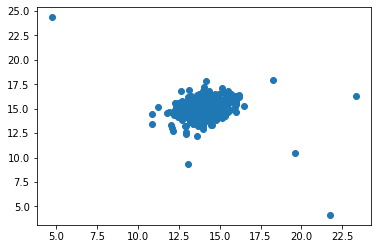

In [33]:
plt.scatter(X[:,0], X[:,1])
plt.show()

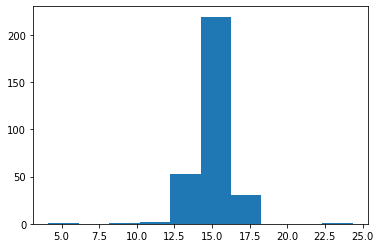

In [34]:
plt.hist(X[:,1])
plt.show()

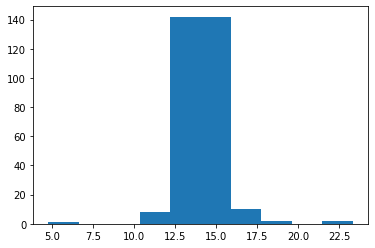

In [35]:
plt.hist(X[:,0])
plt.show()

In [36]:
def estimate_gaussian(X):  
    mu = np.mean(X) 
    sigma = np.var(X)
    return mu, sigma

x1_mean_var = estimate_gaussian(X[:,0])
x2_mean_var = estimate_gaussian(X[:,1])
print(x1_mean_var)
print(x2_mean_var)


(14.112225783945592, 1.8326314134945172)
(14.99771050813621, 1.7097453308287784)


In [37]:
Xval = data['Xval']  
yval = data['yval']
 
# TODO: check the number of data (X.shape)
Xval.shape

(307, 2)

In [38]:
p_X1 = np.zeros((X.shape[0]))
p_X2 = np.zeros((X.shape[0]))
gauss1 = stats.norm.pdf(X[:,0], loc=x1_mean_var[0], scale=np.sqrt(x1_mean_var[1]))
gauss2 = stats.norm.pdf(X[:,1], loc=x2_mean_var[0], scale=np.sqrt(x2_mean_var[1]))


In [39]:
gauss1

array([2.16209766e-01, 2.57452082e-01, 2.94132233e-01, 2.47211916e-01,
       2.72515466e-01, 2.91811896e-01, 1.87139581e-01, 1.51176483e-01,
       9.35633051e-02, 1.66608997e-01, 2.93387080e-01, 2.94487687e-01,
       2.55592373e-01, 2.55956210e-01, 2.93271402e-01, 2.94445597e-01,
       2.92880166e-01, 2.85183307e-01, 2.77277592e-01, 9.48976543e-02,
       2.70272714e-01, 2.93421614e-01, 2.41105554e-01, 2.93042880e-01,
       1.96077288e-01, 1.56529793e-01, 2.75904586e-01, 2.57496215e-01,
       2.76670469e-01, 2.83495304e-01, 1.70682832e-01, 2.93186130e-01,
       2.04326372e-01, 1.95772970e-01, 1.08970523e-01, 2.45951257e-01,
       1.40637462e-01, 2.94633744e-01, 2.80527513e-01, 2.93718568e-01,
       2.81681579e-01, 2.25242931e-01, 2.82189416e-01, 2.94296621e-01,
       2.66749616e-01, 2.88560129e-01, 1.11371039e-01, 2.94677206e-01,
       2.89041960e-01, 1.85565845e-01, 2.40902893e-01, 2.79275320e-01,
       2.85710057e-01, 2.94679955e-01, 2.79865441e-01, 2.94563913e-01,
      

In [40]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm.pdf(Xval[:,0], x1_mean_var[0], np.sqrt(x1_mean_var[1]))
pval[:,1] = stats.norm.pdf(Xval[:,1], x2_mean_var[0], np.sqrt(x2_mean_var[1]))
print(pval[:,1].min())
print(pval[:,1].max())
pval[:10, 1]

5.810923665605239e-13
0.30510142489030334


array([0.30457725, 0.29540963, 0.16132253, 0.22661829, 0.27090007,
       0.20830726, 0.30231612, 0.28875122, 0.26524155, 0.30426236])

In [41]:
def select_threshold(pval, yval): 
    pspace = np.array(np.linspace(pval.min(),pval.max(),10000))
    best_eps = pspace[0]
    eps = pspace[0]
    pred = np.zeros((len(yval),1))
    for k in range(len(yval)):
        if pval[k,0] > eps or pval[k,1] > eps:
            pred[k] = 1
    best_f1 = f1_score(yval, pred)
    for i in range(len(pspace)):
        eps = pspace[i]
        pred = np.zeros((len(yval),1))
        for k in range(len(yval)):
            if pval[k,0] < eps or pval[k,1] < eps:
                pred[k] = 1
        f1 = f1_score(yval, pred)
        if f1 > best_f1:
            best_eps = eps
            best_f1 = f1
    return best_eps, best_f1
  
print(select_threshold(pval, yval))

(0.0003966715195093453, 0.8750000000000001)


Text(0.5, 1.0, 'Final result')

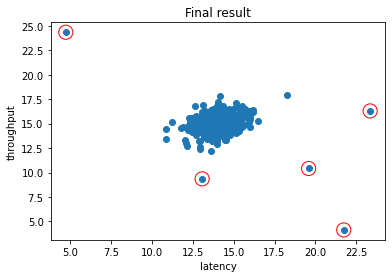

In [45]:
eps, f1 = select_threshold(pval, yval)
t1 = gauss1 < eps
t2 = gauss2 < eps
y = np.logical_or(t1,t2).astype(int)
anomalies = np.where(y == 1)
AN = np.zeros((anomalies[0].shape[0], 2))
for ii in range (0, anomalies[0].shape[0]):
    AN[ii, 0] = X[anomalies[0][ii], 0]
    AN[ii, 1] = X[anomalies[0][ii], 1]

plt.scatter(X[:,0], X[:,1])
plt.scatter(AN[:,0], AN[:,1], s=200, facecolors='none', edgecolors='r')
plt.xlabel('latency')
plt.ylabel('throughput')
plt.title('Wynik')
